<a href="https://colab.research.google.com/github/basharbayatna/Adult_Income-/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Setting options
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
from sklearn import set_config
set_config(transform_output='pandas')

# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_columns',100)

In [2]:
fpath = '/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week17/Data/adult.csv'
df = pd.read_csv(fpath)

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.duplicated(keep=False).sum()

np.int64(101)

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.value_counts()

age  workclass         fnlwgt  education     educational-num  marital-status      occupation       relationship  race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
90   Self-emp-not-inc  282095  Some-college  10               Married-civ-spouse  Farming-fishing  Husband       White  Male    0             0             40              United-States   <=50K     1
17   ?                 27251   11th          7                Widowed             ?                Own-child     White  Male    0             0             40              United-States   <=50K     1
                       34019   10th          6                Never-married       ?                Own-child     White  Male    0             0             20              United-States   <=50K     1
                       34088   12th          8                Never-married       ?                Own-child     White  Female  0             0             25              United-States   <=50K     1
                       34505   11th          7                Never-married       ?                Own-child     White  Male    0             0             50              United-States   <=50K     1
                                                                                                                                                                                                     ..
                       48610   HS-grad       9                Never-married       ?                Own-child     White  Male    0             0             14              United-States   <=50K     1
                       47407   11th          7                Never-married       ?                Own-child     White  Male    0             0             10              United-States   <=50K     1
                       45037   10th          6                Never-married       ?                Own-child     White  Female  0             0             25              United-States   <=50K     1
                       44789   Some-college  10               Never-married       ?                Own-child     White  Male    0             0             15              United-States   <=50K     1
                       41643   11th          7                Never-married       ?                Own-child     White  Female  0             0             15              United-States   <=50K     1
Name: count, Length: 48790, dtype: int64

In [8]:
df['income'].value_counts()

,count
income,
<=50K,37109
>50K,11681


In [9]:

for i in df:
  print(f'Value Count for {i}')
  print(df[i]. value_counts())
  print('\n')
  print('\n')





Value Count for age
age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64




Value Count for workclass
workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64




Value Count for fnlwgt
fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
189950     1
343059     1
302465     1
156843     1
240521     1
Name: count, Length: 28523, dtype: int64




Value Count for education
education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th             

In [10]:
df.nunique()

,0
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


In [11]:
df['age'].describe()

,age
count,48790.000000
mean,38.652798
std,13.708493
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [12]:
df['age'].dtype


dtype('int64')

In [13]:
df['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
?,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [14]:
df['workclass'] = df['workclass'].replace({'?': 'MISSING'})

In [15]:
df['workclass'].value_counts()

,count
workclass,
Private,33860
Self-emp-not-inc,3861
Local-gov,3136
MISSING,2795
State-gov,1981
Self-emp-inc,1694
Federal-gov,1432
Without-pay,21
Never-worked,10


In [16]:
df['fnlwgt'].describe()

,fnlwgt
count,4.879000e+04
mean,1.896690e+05
std,1.056172e+05
min,1.228500e+04
25%,1.175550e+05
50%,1.781385e+05
75%,2.376062e+05
max,1.490400e+06


In [17]:
df['education'].value_counts()

,count
education,
HS-grad,15770
Some-college,10863
Bachelors,8013
Masters,2656
Assoc-voc,2060
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,954


In [18]:
df['educational-num'].value_counts()

,count
educational-num,
9,15770
10,10863
13,8013
14,2656
11,2060
7,1812
12,1601
6,1389
4,954


In [19]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22366
Never-married,16082
Divorced,6630
Separated,1530
Widowed,1518
Married-spouse-absent,627
Married-AF-spouse,37


In [20]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
?,2805
Transport-moving,2355


In [21]:
df['occupation'] = df['occupation'].replace({'?': 'MISSING'})

In [22]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6165
Craft-repair,6102
Exec-managerial,6082
Adm-clerical,5606
Sales,5501
Other-service,4919
Machine-op-inspct,3017
MISSING,2805
Transport-moving,2355


In [23]:
df['native-country'].value_counts()

,count
native-country,
United-States,43792
Mexico,943
?,856
Philippines,294
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [24]:
df['native-country'] = df['native-country'].replace({'?': 'MISSING'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [26]:
df['income'].value_counts()

,count
income,
<=50K,37109
>50K,11681


In [27]:
df['income'] = df['income'].replace({'>50K': 'LOW', '<=50K': 'HIGH'})

In [28]:
df['income'].value_counts()

,count
income,
HIGH,37109
LOW,11681


# Visualizations

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def explore_numaric(df, x, figsize=(6,5)):
    null_count = df[x].isna().sum()
    null_perc = null_count / len(df) * 100

    gridspec = {'height_ratios': [0.7, 0.3]}
    plt.style.use('dark_background')
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                             sharex=True, gridspec_kw=gridspec)
    color = sns.color_palette("Set1")[0]

    # suppress warnings from seaborn or matplotlib
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.histplot(data=df, x=x, ax=axes[0], color=color)
        sns.boxplot(data=df, x=x, ax=axes[1], color=color)

    axes[0].set_title(f'Column : {x}')

    # define ax so ax.grid works
    ax = axes[0]
    ax.grid(True, linestyle="--", alpha=0.5, axis='y')

    fig.tight_layout()
    plt.show()

    # print stats
    print(f'- NaN found: {null_count} ({round(null_perc, 2)}%)')
    nunique = df[x].nunique()
    print(f"- Unique Values: {nunique}")

    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

    if perc_most_common > 98:
        print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
        print("- Not constant or quasi-constant.")

    return fig, axes


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  plt.style.use("dark_background")


  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  ax.grid(True, linestyle="--", alpha=0.5, axis='y')


  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


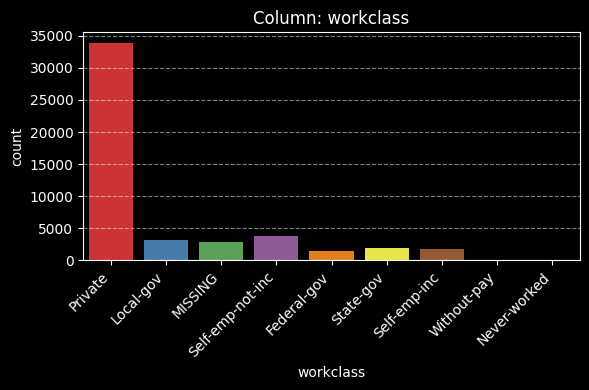

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33860 times (69.4%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: workclass'}, xlabel='workclass', ylabel='count'>)

In [32]:
explore_categorical(df, x= 'workclass')

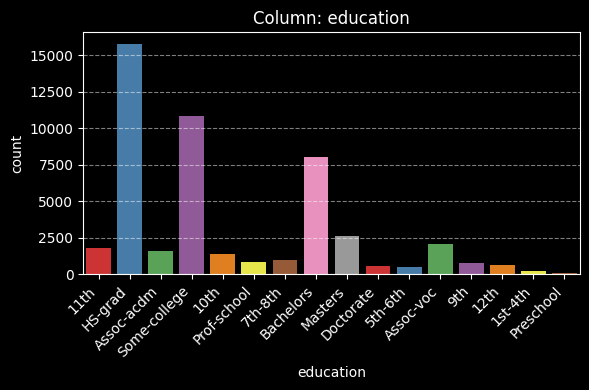

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: education'}, xlabel='education', ylabel='count'>)

In [33]:
explore_categorical(df, x='education')

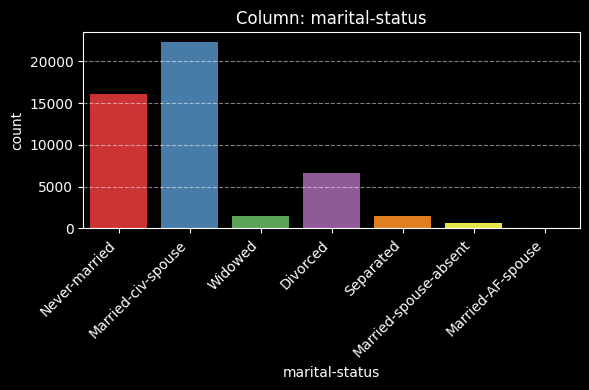

- NaN's Found: 0 (0.0%)
- Unique Values: 7
- Most common value: 'Married-civ-spouse' occurs 22366 times (45.84%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: marital-status'}, xlabel='marital-status', ylabel='count'>)

In [34]:
explore_categorical(df, x='marital-status')

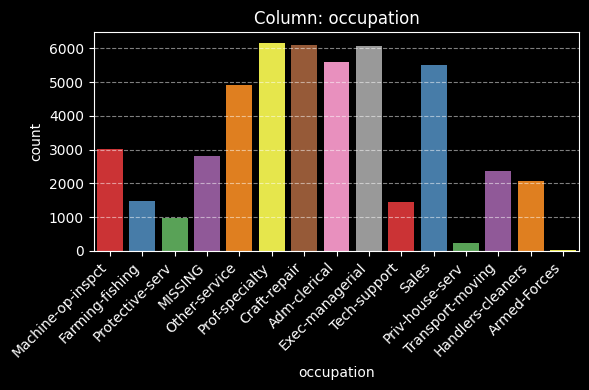

- NaN's Found: 0 (0.0%)
- Unique Values: 15
- Most common value: 'Prof-specialty' occurs 6165 times (12.64%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: occupation'}, xlabel='occupation', ylabel='count'>)

In [35]:
explore_categorical(df, x='occupation')

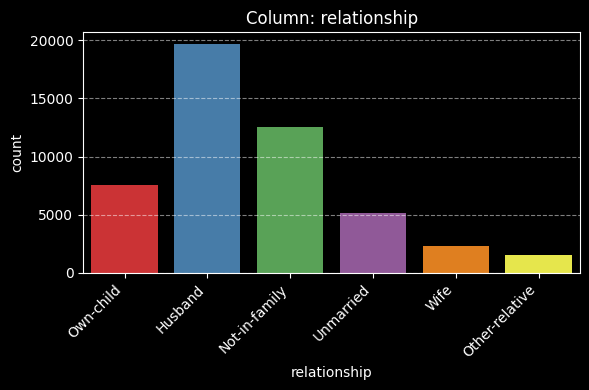

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19703 times (40.38%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: relationship'}, xlabel='relationship', ylabel='count'>)

In [36]:
explore_categorical(df, x='relationship')

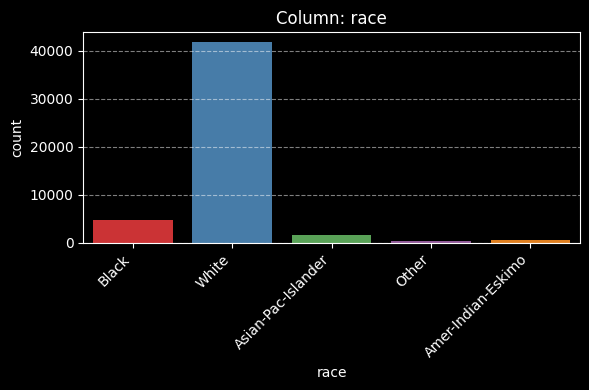

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'White' occurs 41714 times (85.5%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: race'}, xlabel='race', ylabel='count'>)

In [37]:
explore_categorical(df, x='race')

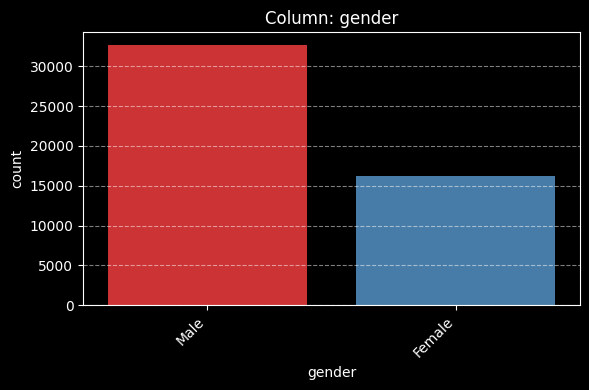

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 32614 times (66.85%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: gender'}, xlabel='gender', ylabel='count'>)

In [38]:
explore_categorical(df, x='gender')

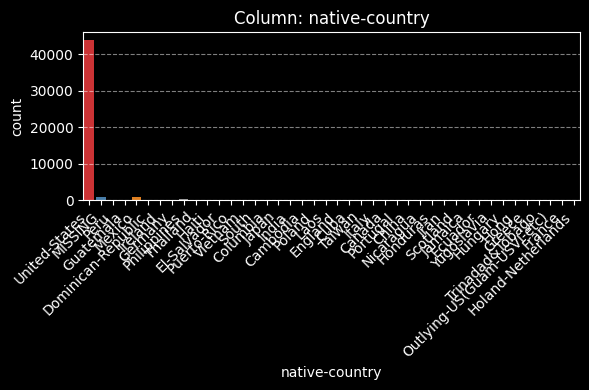

- NaN's Found: 0 (0.0%)
- Unique Values: 42
- Most common value: 'United-States' occurs 43792 times (89.76%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: native-country'}, xlabel='native-country', ylabel='count'>)

In [39]:
explore_categorical(df, x='native-country')

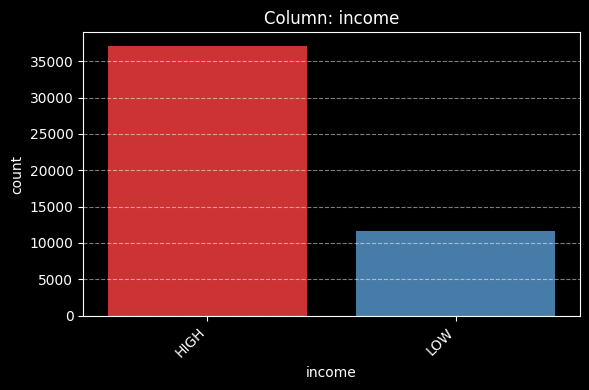

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'HIGH' occurs 37109 times (76.06%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: income'}, xlabel='income', ylabel='count'>)

In [40]:
explore_categorical(df, x='income')

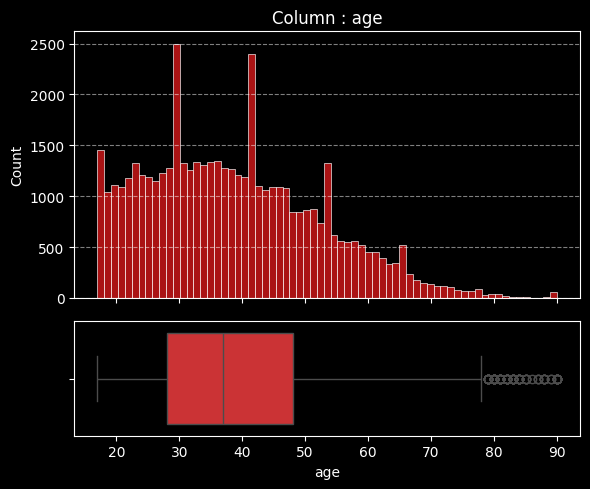

- NaN found: 0 (0.0%)
- Unique Values: 74
- Most common value: '36' occurs 1348 times (2.76%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : age'}, xlabel='age', ylabel='Count'>,
        <Axes: xlabel='age'>], dtype=object))

In [41]:
explore_numaric(df, x='age')

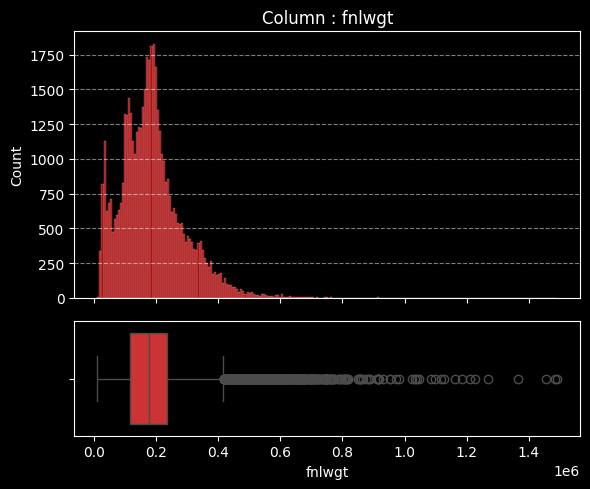

- NaN found: 0 (0.0%)
- Unique Values: 28523
- Most common value: '203488' occurs 21 times (0.04%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : fnlwgt'}, xlabel='fnlwgt', ylabel='Count'>,
        <Axes: xlabel='fnlwgt'>], dtype=object))

In [42]:
explore_numaric(df, x='fnlwgt')

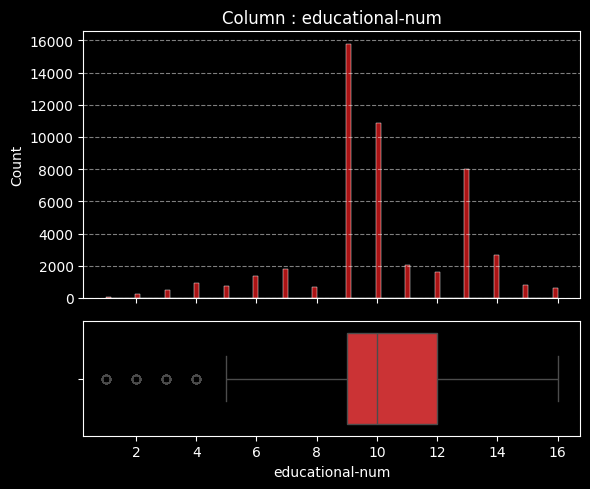

- NaN found: 0 (0.0%)
- Unique Values: 16
- Most common value: '9' occurs 15770 times (32.32%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : educational-num'}, xlabel='educational-num', ylabel='Count'>,
        <Axes: xlabel='educational-num'>], dtype=object))

In [43]:
explore_numaric(df, x='educational-num')

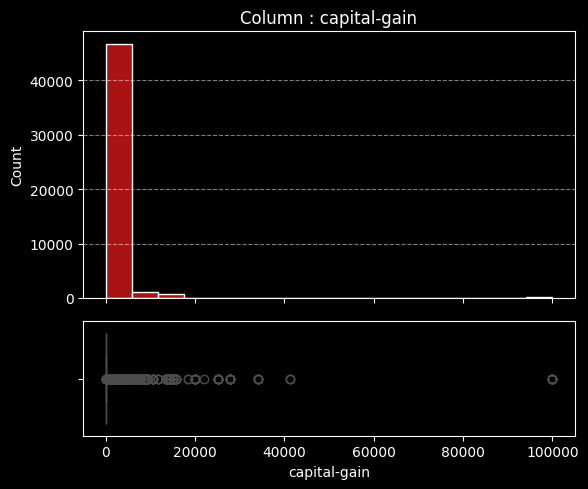

- NaN found: 0 (0.0%)
- Unique Values: 123
- Most common value: '0' occurs 44755 times (91.73%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : capital-gain'}, xlabel='capital-gain', ylabel='Count'>,
        <Axes: xlabel='capital-gain'>], dtype=object))

In [44]:
explore_numaric(df, x= 'capital-gain' )

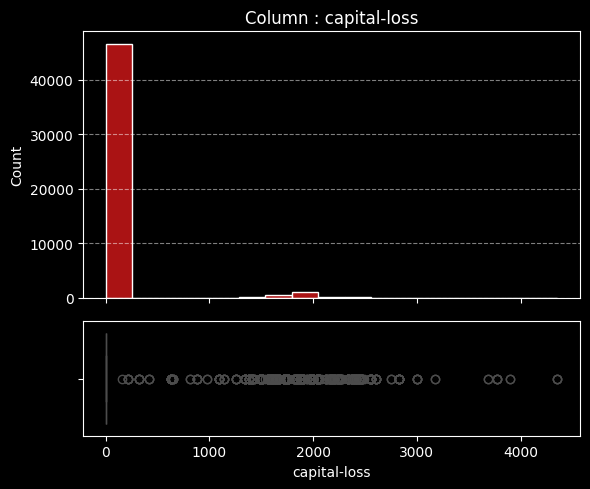

- NaN found: 0 (0.0%)
- Unique Values: 99
- Most common value: '0' occurs 46508 times (95.32%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : capital-loss'}, xlabel='capital-loss', ylabel='Count'>,
        <Axes: xlabel='capital-loss'>], dtype=object))

In [45]:
explore_numaric(df, x='capital-loss')

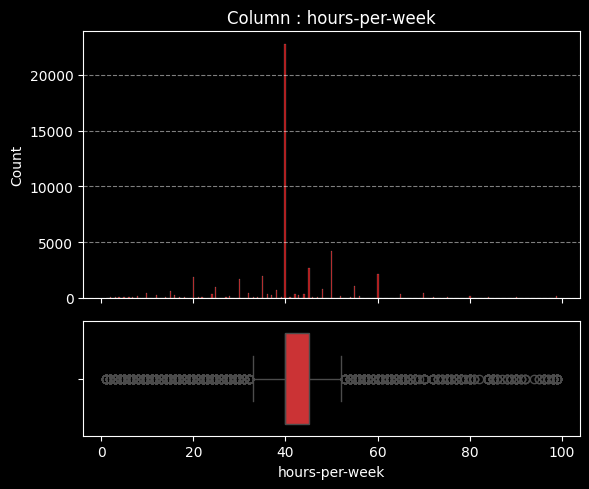

- NaN found: 0 (0.0%)
- Unique Values: 96
- Most common value: '40' occurs 22773 times (46.68%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : hours-per-week'}, xlabel='hours-per-week', ylabel='Count'>,
        <Axes: xlabel='hours-per-week'>], dtype=object))

In [46]:
explore_numaric(df, x='hours-per-week')

# Preprocessing

In [47]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output='pandas')

In [48]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [49]:
df = df.replace({'MISSING': np.nan})

In [50]:
df.isna().sum()

,0
age,0
workclass,2795
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


In [51]:
columns_todrop = ['education', 'fnlwgt']

X = df.drop(columns=[*columns_todrop, 'income'])
y = df['income']

X.head()
y.head()

,income
0,HIGH
1,HIGH
2,LOW
3,LOW
4,HIGH


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)



In [53]:
y.value_counts(1)

,proportion
income,
HIGH,0.760586
LOW,0.239414


In [54]:
num_cols = X_train.select_dtypes('number').columns

scaler = StandardScaler()




num_pipe = make_pipeline(scaler)

num_tuple = ('numarical', num_pipe, num_cols)
num_tuple

('numarical',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'))

In [55]:
cat_cols = X_train.select_dtypes('object').columns

impute_na = SimpleImputer(strategy='constant', fill_value='MISSING')


ohe_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
cat_tuple = ('categorical', ohe_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(drop='first', handle_unknown='ignore',
                                sparse_output=False))]),
 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
        'gender', 'native-country'],
       dtype='object'))

In [56]:
X_train.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
38093,82,NaN,11,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States
43391,30,State-gov,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States
3064,28,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,3137,0,45,United-States
45606,20,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,15,France
2116,39,Private,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [57]:
preprocessor = ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out=False)

from imblearn.over_sampling import SMOTE

# preprocess data manually first
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

print("After SMOTE:", y_resampled.value_counts())



Before SMOTE: income
HIGH    27841
LOW      8751
Name: count, dtype: int64
After SMOTE: income
HIGH    27841
LOW     27841
Name: count, dtype: int64


# Random Forest Model

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

In [59]:
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            threshold=0.5,
                            figsize=(6,4), normalize='true', output_dict=False,
                            cmap_train='Blues', cmap_test="Reds", colorbar=False):

    # ------------------- Training data -------------------
    # Get predicted probabilities for class 1
    y_train_prob = model.predict_proba(X_train)[:, 1]
    # Apply threshold
    y_train_pred = (y_train_prob >= threshold).astype(int)

    # Call helper function for metrics
    results_train = classification_metrics(y_train, y_train_pred,
                                           output_dict=True, figsize=figsize,
                                           colorbar=colorbar, cmap=cmap_train,
                                           label='Training Data')
    print()

    # ------------------- Test data -------------------
    y_test_prob = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_prob >= threshold).astype(int)

    results_test = classification_metrics(y_test, y_test_pred,
                                          output_dict=True, figsize=figsize,
                                          colorbar=colorbar, cmap=cmap_test,
                                          label='Test Data')

    if output_dict:
        results_dict = {'train': results_train, 'test': results_test}
        return results_dict


In [60]:
Rf = RandomForestClassifier(random_state=42)
Rf.fit(X_resampled, y_resampled)





RandomForestClassifier(random_state=42)

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27841
           1       0.98      0.98      0.98     27841

    accuracy                           0.98     55682
   macro avg       0.98      0.98      0.98     55682
weighted avg       0.98      0.98      0.98     55682



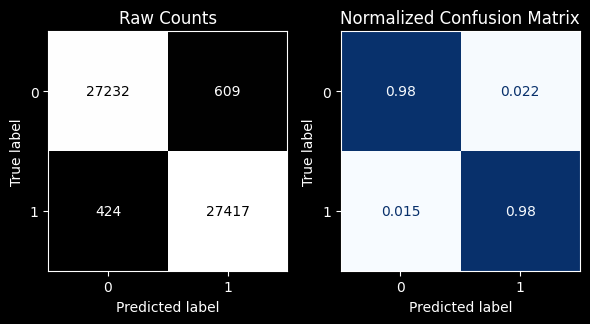


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      9268
           1       0.67      0.68      0.68      2930

    accuracy                           0.84     12198
   macro avg       0.78      0.79      0.79     12198
weighted avg       0.84      0.84      0.84     12198



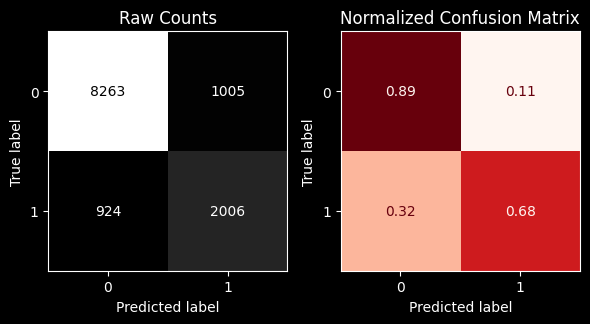

In [62]:
# Evaluate the model
evaluate_classification(
    Rf,
    X_resampled, y_resampled_encoded,  # training data
    X_test_processed, y_test_encoded,  # test data

)


# Feature Importance

Top 10 Important Features:
age                                  0.220835
educational-num                      0.132533
marital-status_Married-civ-spouse    0.109736
hours-per-week                       0.106580
capital-gain                         0.068746
marital-status_Never-married         0.053248
relationship_Own-child               0.028199
relationship_Not-in-family           0.023962
gender_Male                          0.023309
capital-loss                         0.021929
dtype: float64


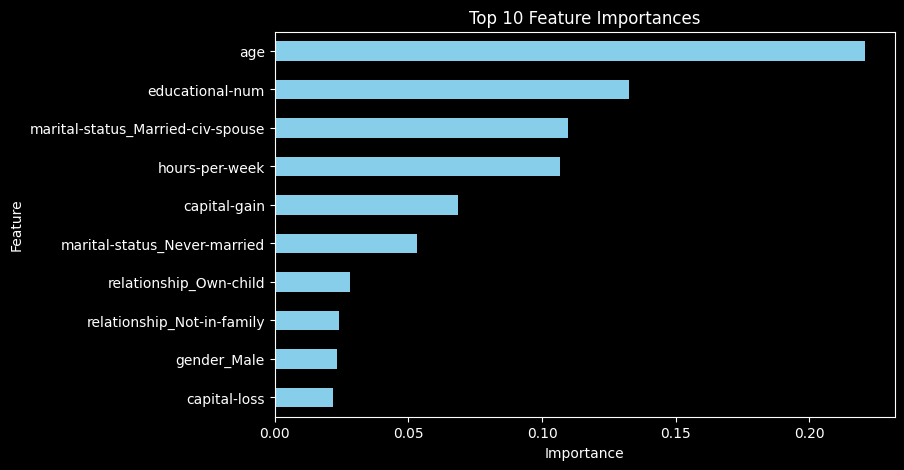

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

#  Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

#  Get feature importances from the Random Forest
importances = Rf.feature_importances_

#  Create a Pandas Series to map names to importance
feat_imp = pd.Series(importances, index=feature_names)

#  Sort in descending order and get top 10
top10 = feat_imp.sort_values(ascending=False).head(10)
print("Top 10 Important Features:")
print(top10)

# plot top 10 features
plt.figure(figsize=(8,5))
top10.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Visualizations for the Most Importent Features

In [64]:


def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci', sorted=False, ascending=False,
                           palette='Set2', **kwargs):
    """
    Plots numeric feature vs target variable.
    Works for regression (scatter + regression line) and classification (barplot).
    """

    # Dark background style
    plt.style.use('dark_background')

    # Handle NaNs
    nulls = df[[x,y]].isna().sum()
    if nulls.sum() > 0:
        print(f"- Excluding {nulls.sum()} NaN's")
        temp_df = df.dropna(subset=[x,y])
    else:
        temp_df = df

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION-TARGET PLOT
    if 'reg' in target_type:
        # Correlation
        corr = df[[x,y]].corr().round(2)
        r = corr.loc[x,y]

        # Scatter + regression line
        scatter_kws = {'ec':'white', 'linewidths':1, 'alpha':0.8}
        sns.regplot(
            data=temp_df, x=x, y=y, ax=ax,
            scatter_kws=scatter_kws,
            line_kws={'color':'orange'},   # regression line color
            **kwargs
        )

        ax.set_title(f"{x} vs. {y} (r = {r})")

    # CLASSIFICATION-TARGET PLOT
    elif 'class' in target_type:
        # Sorting groups if requested
        if sorted:
            if estimator == 'median':
                group_vals = temp_df.groupby(y)[x].median()
            elif estimator == 'mean':
                group_vals = temp_df.groupby(y)[x].mean()
            group_vals = group_vals.sort_values(ascending=ascending)
            order = group_vals.index
        else:
            order = None

        # Barplot with palette
        sns.barplot(
            data=temp_df, x=y, y=x, order=order,
            estimator=estimator, errorbar=errorbar,
            palette=palette, ax=ax, **kwargs
        )

        ax.set_title(f"{x} vs. {y}")
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Final adjustments
    fig.tight_layout()
    return fig, ax



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'age vs. income'}, xlabel='income', ylabel='age'>)

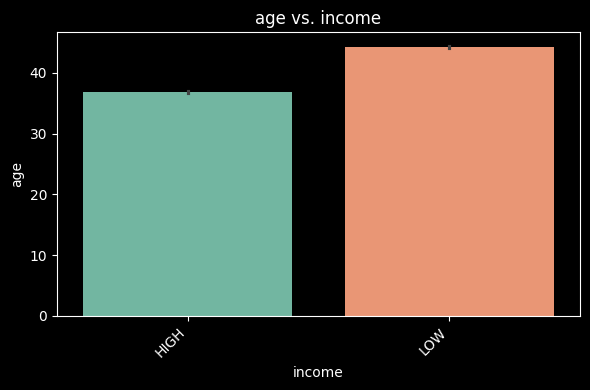

In [65]:
feature = 'age'
plot_numeric_vs_target(df, feature, 'income', target_type='class')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'educational-num vs. income'}, xlabel='income', ylabel='educational-num'>)

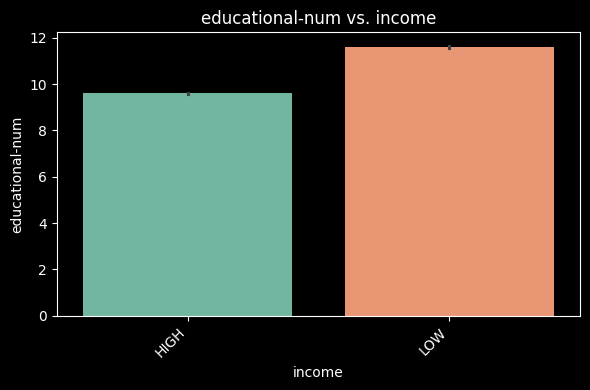

In [66]:
feature = 'educational-num'
plot_numeric_vs_target(df, feature,'income', target_type='class')

In [67]:


def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None, target_type='reg',
                               palette='Set2'):
    # Dark background style
    plt.style.use('dark_background')

    # Copy dataframe and handle missing values
    temp_df = df.copy()
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
    else:
        temp_df = temp_df.dropna(subset=[x])

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # REGRESSION-TARGET PLOT
    if target_type == 'reg':
        # Barplot
        sns.barplot(
            data=temp_df, x=x, y=y, ax=ax,
            order=order, alpha=0.6,
            linewidth=1, edgecolor='black',
            errorbar=None, palette=palette,
            hue=x, legend=False
        )
        # Stripplot
        sns.stripplot(
            data=temp_df, x=x, y=y, ax=ax,
            order=order, hue=x, hue_order=order,
            legend=False, edgecolor='white',
            linewidth=0.5, size=3, zorder=0,
            palette=palette
        )

    # CLASSIFICATION-TARGET PLOT
    elif target_type == 'class':
        sns.histplot(
            data=temp_df, hue=y, x=x,
            stat='percent', multiple='fill',
            palette=palette, ax=ax
        )

    # Rotate xlabels
    ax.set_xticks(ax.get_xticks())  # Prevent matplotlib bug
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}")

    fig.tight_layout()
    return fig, ax


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'gender vs. income'}, xlabel='gender', ylabel='Percent'>)

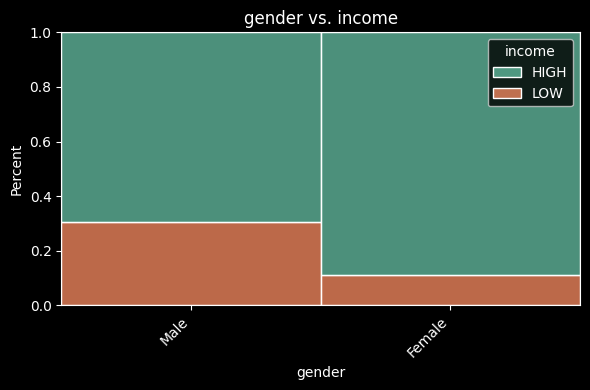

In [68]:
feature = 'gender'
plot_categorical_vs_target(df, feature, 'income', target_type='class')

# PCA

In [69]:
# Instantiate & fit data using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_resampled)
print("Shape after PCA:", X_pca.shape)


# How much variance each component explains
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))


X_test_pca = pca.transform(X_test_processed)
print("Test set shape after PCA:", X_test_pca.shape)


Shape after PCA: (55682, 3)
Explained variance ratio: [0.24673505 0.16690904 0.12071883]
Total explained variance: 0.5343629137147414
Test set shape after PCA: (12198, 3)


# Clustering

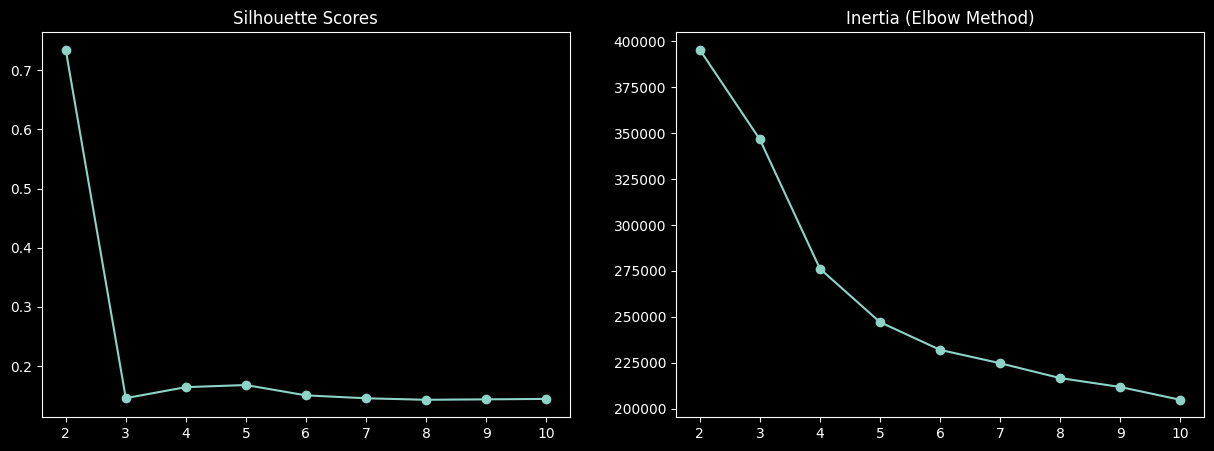

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

ks = range(2, 11)
sils = []
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_resampled)
    sils.append(silhouette_score(X_resampled, kmeans.labels_))
    inertias.append(kmeans.inertia_)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].plot(ks, sils, marker='o')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias, marker='o')
axes[1].set_title('Inertia (Elbow Method)')
axes[1].set_xticks(ks)
plt.show()


In [71]:
from sklearn.cluster import KMeans
import numpy as np

# Fit KMeans on the training set only
kmeans_final = KMeans(n_clusters=3, n_init='auto', random_state=42)
cluster_train = kmeans_final.fit_predict(X_resampled)  # cluster labels for training


In [72]:
# Assign clusters to the test set based on the training clusters
cluster_test = kmeans_final.predict(X_test_processed)


In [73]:
# Add cluster labels as a new column/feature
X_train_with_clusters = np.concatenate([X_resampled, cluster_train.reshape(-1,1)], axis=1)
X_test_with_clusters = np.concatenate([X_test_processed, cluster_test.reshape(-1,1)], axis=1)

print("Training shape with cluster feature:", X_train_with_clusters.shape)
print("Test shape with cluster feature:", X_test_with_clusters.shape)


Training shape with cluster feature: (55682, 85)
Test shape with cluster feature: (12198, 85)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   age              int64 
 1   workclass        object
 2   fnlwgt           int64 
 3   education        object
 4   educational-num  int64 
 5   marital-status   object
 6   occupation       object
 7   relationship     object
 8   race             object
 9   gender           object
 10  capital-gain     int64 
 11  capital-loss     int64 
 12  hours-per-week   int64 
 13  native-country   object
 14  income           object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


# New model

In [75]:
# Combine PCA components + cluster labels
cluster_train_reshaped = cluster_train.reshape(-1, 1)
cluster_test_reshaped = cluster_test.reshape(-1, 1)

X_train_pca_cluster = np.concatenate([X_pca, cluster_train_reshaped], axis=1)
X_test_pca_cluster = np.concatenate([X_test_pca, cluster_test_reshaped], axis=1)

print("Training shape (PCA + cluster):", X_train_pca_cluster.shape)
print("Test shape (PCA + cluster):", X_test_pca_cluster.shape)


Training shape (PCA + cluster): (55682, 4)
Test shape (PCA + cluster): (12198, 4)


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train_pca_cluster, y_resampled_encoded)  # train on PCA + cluster features





RandomForestClassifier(random_state=42)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27841
           1       0.98      0.98      0.98     27841

    accuracy                           0.98     55682
   macro avg       0.98      0.98      0.98     55682
weighted avg       0.98      0.98      0.98     55682



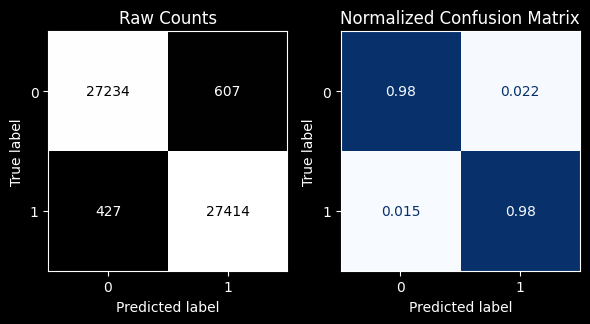


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      9268
           1       0.54      0.76      0.63      2930

    accuracy                           0.79     12198
   macro avg       0.73      0.78      0.74     12198
weighted avg       0.82      0.79      0.80     12198



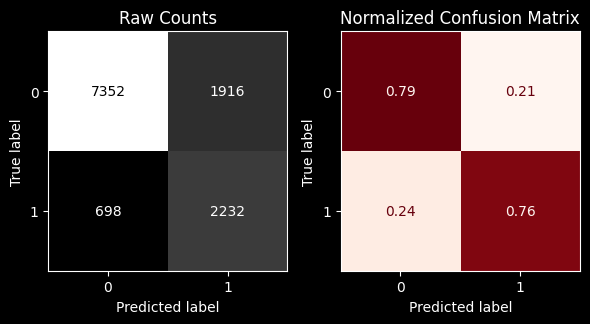

In [77]:
evaluate_classification(rf_new, X_train_pca_cluster, y_resampled_encoded, X_test_pca_cluster, y_test_encoded)

# Permutation importance

In [78]:
# Combine EVERYTHING: original features + PCA + clusters
X_train_engineered = np.concatenate([
    X_resampled,           # Original features
    X_pca,                 # 3 PCA components
    cluster_train.reshape(-1, 1)  # Cluster labels
], axis=1)

X_test_engineered = np.concatenate([
    X_test_processed,      # Original features
    X_test_pca,           # 3 PCA components
    cluster_test.reshape(-1, 1)   # Cluster labels
], axis=1)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27841
           1       0.98      0.98      0.98     27841

    accuracy                           0.98     55682
   macro avg       0.98      0.98      0.98     55682
weighted avg       0.98      0.98      0.98     55682



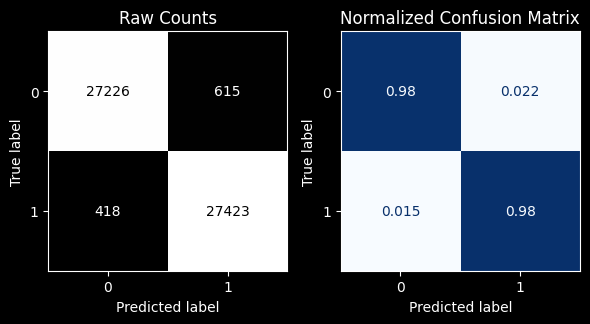


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      9268
           1       0.66      0.73      0.69      2930

    accuracy                           0.84     12198
   macro avg       0.78      0.80      0.79     12198
weighted avg       0.85      0.84      0.85     12198



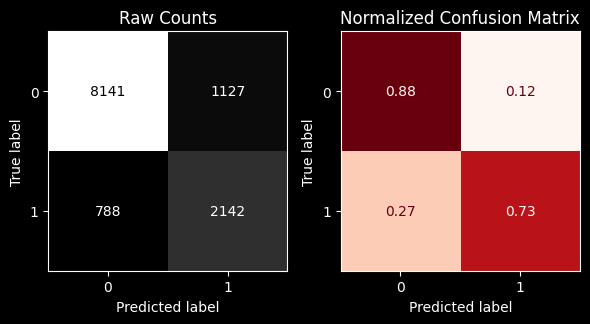

In [79]:
# Model 2: With all original + engineered features
rf_engineered = RandomForestClassifier(random_state=42)
rf_engineered.fit(X_train_engineered, y_resampled_encoded)
evaluate_classification(rf_engineered, X_train_engineered, y_resampled_encoded,
                       X_test_engineered, y_test_encoded)

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 20 features from engineered dataset
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_engineered, y_resampled_encoded)
X_test_selected = selector.transform(X_test_engineered)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27841
           1       0.98      0.98      0.98     27841

    accuracy                           0.98     55682
   macro avg       0.98      0.98      0.98     55682
weighted avg       0.98      0.98      0.98     55682



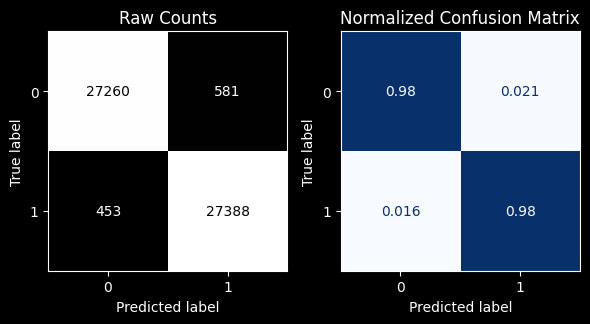


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9268
           1       0.61      0.72      0.66      2930

    accuracy                           0.82     12198
   macro avg       0.76      0.79      0.77     12198
weighted avg       0.84      0.82      0.83     12198



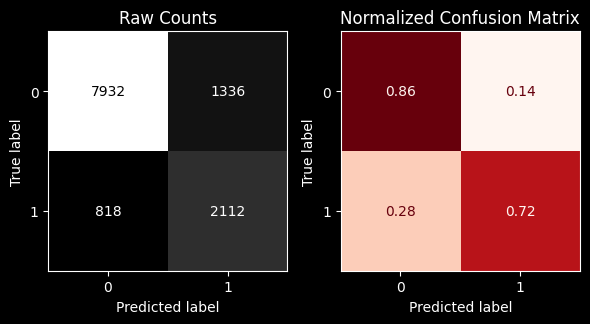

In [81]:
# Model 3: With selected features only
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_selected, y_resampled_encoded)
evaluate_classification(rf_final, X_train_selected, y_resampled_encoded,
                       X_test_selected, y_test_encoded)

CALCULATING PERMUTATION IMPORTANCE FOR MODEL 3 (rf_engineered)

Calculating permutation importance (this may take 1-2 minutes)...
✓ Permutation importance calculated!

Total number of features in Model 3: 88

TOP 10 FEATURES BY PERMUTATION IMPORTANCE (Model 3)

15. marital-status_Married-civ-spouse        | Importance: 0.016708 (±0.001936)
 3. capital-gain                             | Importance: 0.014027 (±0.001146)
 4. capital-loss                             | Importance: 0.006813 (±0.000212)
 1. age                                      | Importance: 0.005140 (±0.001431)
85. PCA_1                                    | Importance: 0.002804 (±0.002044)
11. workclass_Self-emp-not-inc               | Importance: 0.001713 (±0.000611)
 2. educational-num                          | Importance: 0.001681 (±0.001280)
22. occupation_Exec-managerial               | Importance: 0.001394 (±0.001333)
27. occupation_Other-service                 | Importance: 0.001353 (±0.000708)
82. native-country

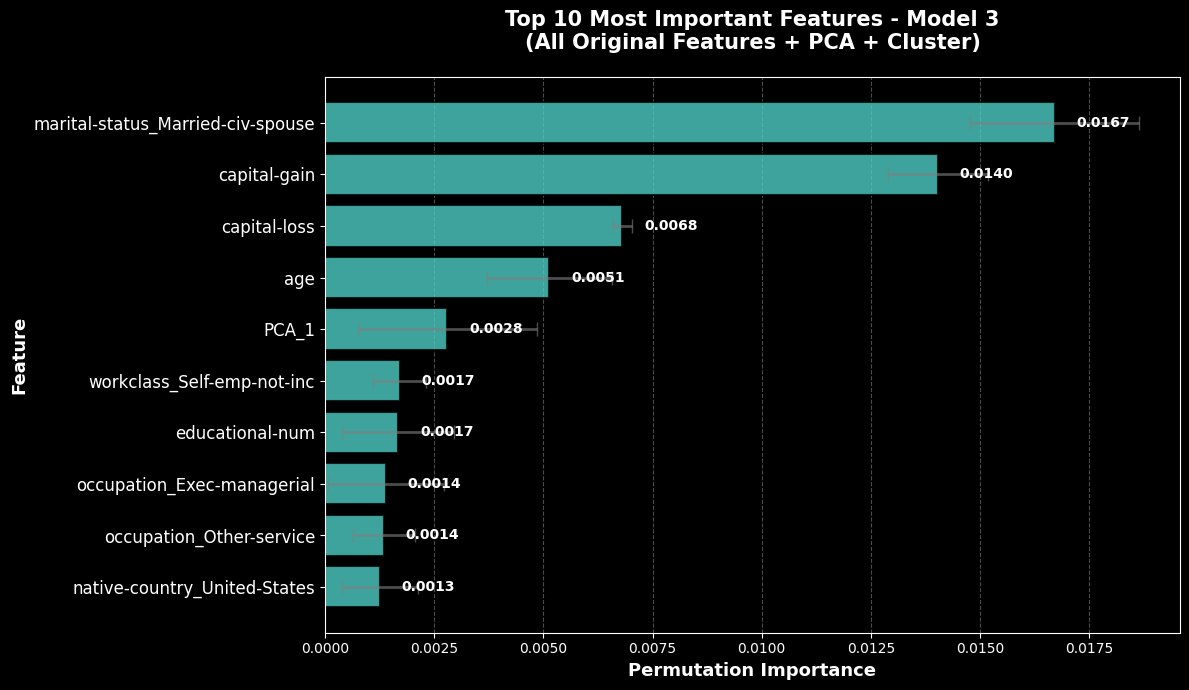


ENGINEERED FEATURES ANALYSIS

🔍 PCA Features:
   ✓ YES! 1 PCA component(s) in top 10:
      - PCA_1: Rank #85, Importance = 0.002804

🔍 Cluster Feature:
   ✗ Cluster is NOT in top 10
      - Rank: #88 out of 88
      - Importance: -0.002131


💾 Saving results for model comparison...
✓ Results saved to 'top10_model3'



In [82]:
# ============================================================================
# PERMUTATION IMPORTANCE - MODEL 3 (Original + PCA + Cluster)
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

print("=" * 80)
print("CALCULATING PERMUTATION IMPORTANCE FOR MODEL 3 (rf_engineered)")
print("=" * 80)
print()

# Step 1: Calculate Permutation Importance
print("Calculating permutation importance (this may take 1-2 minutes)...")
perm_importance = permutation_importance(
    rf_engineered,
    X_test_engineered,
    y_test_encoded,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
print("✓ Permutation importance calculated!")
print()

# Step 2: Get all feature names
# Get numeric and categorical column names
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('object').columns

# Get one-hot encoded categorical feature names
ohe = preprocessor.named_transformers_['categorical'].named_steps['onehotencoder']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

# Combine: original features + PCA components + Cluster
feature_names = np.concatenate([
    num_cols,                           # Numeric features
    cat_feature_names,                  # One-hot encoded categorical
    ['PCA_1', 'PCA_2', 'PCA_3'],       # PCA components
    ['Cluster']                         # Cluster label
])

print(f"Total number of features in Model 3: {len(feature_names)}")
print()

# Step 3: Create DataFrame with importance scores
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Step 4: Get TOP 10 features
top10_features = importance_df.head(10)

print("=" * 80)
print("TOP 10 FEATURES BY PERMUTATION IMPORTANCE (Model 3)")
print("=" * 80)
print()
for idx, row in top10_features.iterrows():
    print(f"{idx+1:2d}. {row['feature']:40s} | Importance: {row['importance_mean']:.6f} (±{row['importance_std']:.6f})")
print()
print("=" * 80)
print()

# Step 5: Visualize Top 10 Features
fig, ax = plt.subplots(figsize=(12, 7))

# Create horizontal bar chart
bars = ax.barh(
    range(len(top10_features)),
    top10_features['importance_mean'],
    color='#4ECDC4',
    edgecolor='black',
    linewidth=1.5,
    alpha=0.8
)

# Add error bars showing standard deviation
ax.errorbar(
    top10_features['importance_mean'],
    range(len(top10_features)),
    xerr=top10_features['importance_std'],
    fmt='none',
    ecolor='gray',
    capsize=5,
    alpha=0.6,
    linewidth=2
)

# Customize y-axis
ax.set_yticks(range(len(top10_features)))
ax.set_yticklabels(top10_features['feature'], fontsize=12)
ax.invert_yaxis()  # Highest importance at top

# Labels and title
ax.set_xlabel('Permutation Importance', fontsize=13, fontweight='bold')
ax.set_ylabel('Feature', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Most Important Features - Model 3\n(All Original Features + PCA + Cluster)',
             fontsize=15, fontweight='bold', pad=20)

# Add value labels on bars
for i, (idx, row) in enumerate(top10_features.iterrows()):
    ax.text(
        row['importance_mean'] + 0.0005,
        i,
        f"{row['importance_mean']:.4f}",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# Add grid
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Step 6: Check for engineered features in top 10
print()
print("=" * 80)
print("ENGINEERED FEATURES ANALYSIS")
print("=" * 80)

# Check if PCA features are in top 10
pca_features = ['PCA_1', 'PCA_2', 'PCA_3']
pca_in_top10 = [f for f in pca_features if f in top10_features['feature'].values]

# Check if Cluster is in top 10
cluster_in_top10 = 'Cluster' in top10_features['feature'].values

print()
print("🔍 PCA Features:")
if pca_in_top10:
    print(f"   ✓ YES! {len(pca_in_top10)} PCA component(s) in top 10:")
    for pca_feat in pca_in_top10:
        rank = top10_features[top10_features['feature'] == pca_feat].index[0] + 1
        importance = top10_features[top10_features['feature'] == pca_feat]['importance_mean'].values[0]
        print(f"      - {pca_feat}: Rank #{rank}, Importance = {importance:.6f}")
else:
    print("   ✗ No PCA components in top 10")
    for pca_feat in pca_features:
        rank = importance_df[importance_df['feature'] == pca_feat].index[0] + 1
        importance = importance_df[importance_df['feature'] == pca_feat]['importance_mean'].values[0]
        print(f"      - {pca_feat}: Rank #{rank}, Importance = {importance:.6f}")

print()
print("🔍 Cluster Feature:")
if cluster_in_top10:
    rank = top10_features[top10_features['feature'] == 'Cluster'].index[0] + 1
    importance = top10_features[top10_features['feature'] == 'Cluster']['importance_mean'].values[0]
    print(f"   ✓ YES! Cluster is in top 10!")
    print(f"      - Rank: #{rank}")
    print(f"      - Importance: {importance:.6f}")
else:
    rank = importance_df[importance_df['feature'] == 'Cluster'].index[0] + 1
    importance = importance_df[importance_df['feature'] == 'Cluster']['importance_mean'].values[0]
    print(f"   ✗ Cluster is NOT in top 10")
    print(f"      - Rank: #{rank} out of {len(feature_names)}")
    print(f"      - Importance: {importance:.6f}")

print()
print("=" * 80)

# Step 7: Save results for later comparison
print()
print("💾 Saving results for model comparison...")
top10_model3 = top10_features.copy()
print("✓ Results saved to 'top10_model3'")
print()
print("=" * 80)

# Nural Network Defult Model

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

#Sci-kit Learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [84]:
# define input shape
input_shape = X_resampled.shape[1]
input_shape

84

In [85]:
# Build binary classification model within function
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?


    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

In [88]:
# Call our build function to build model
clf_model = build_model()

# Get model summary
clf_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 861 (3.36 KB)

 Trainable params: 861 (3.36 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

In [90]:
history = clf_model.fit(X_resampled, y_resampled_encoded,
                        validation_split=.2,
                        epochs=50,
                        verbose=1, callbacks = [early_stop])

Epoch 1/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7676 - loss: 0.4704 - precision: 0.6866 - recall: 0.7181 - val_accuracy: 0.7856 - val_loss: 0.4590 - val_precision: 1.0000 - val_recall: 0.7856
Epoch 2/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8284 - loss: 0.3598 - precision: 0.7665 - recall: 0.7769 - val_accuracy: 0.7823 - val_loss: 0.4774 - val_precision: 1.0000 - val_recall: 0.7823
Epoch 3/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8317 - loss: 0.3542 - precision: 0.7734 - recall: 0.7743 - val_accuracy: 0.7899 - val_loss: 0.4698 - val_precision: 1.0000 - val_recall: 0.7899
Epoch 4/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8317 - loss: 0.3478 - precision: 0.7746 - recall: 0.7774 - val_accuracy: 0.7821 - val_loss: 0.4713 - val_precision: 1.0000 - val_recall: 0.7821
Epoch 5/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8342 - loss: 0.3456 - precision: 0.7763 - recall: 0.7831 - val_accuracy: 0.8168 - va

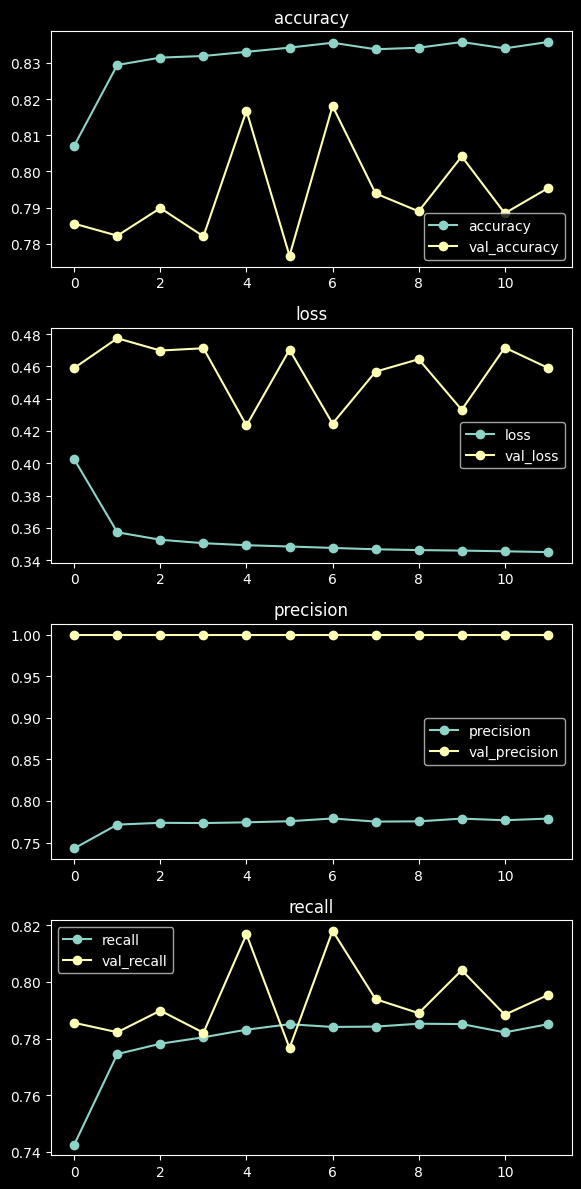

In [91]:
# plot learning history
plot_history(history);

In [92]:
# make predictions
y_pred_test = clf_model.predict(X_test_processed)
y_pred_test[:5]

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.52703   ],
       [0.42069533],
       [0.8609939 ],
       [0.8256794 ],
       [0.18124866]], dtype=float32)

In [93]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      9268
           1       0.64      0.77      0.70      2930

    accuracy                           0.84     12198
   macro avg       0.78      0.82      0.80     12198
weighted avg       0.86      0.84      0.85     12198



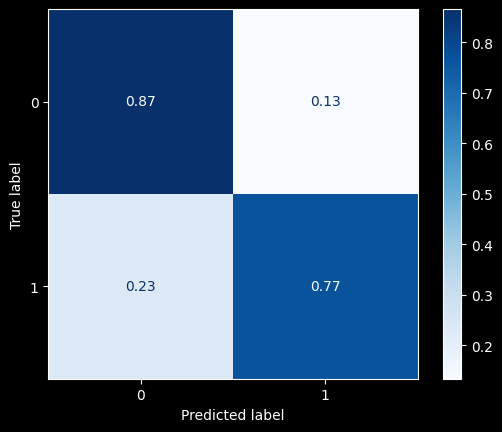

In [94]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_encoded, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_test, cmap='Blues',
                                       normalize='true');

# Nural Network With Keras tuner

In [96]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.8 MB/s eta 0:00:00


In [97]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def build_tuner_model(hp):

    model = Sequential()

    # Tune number of units in hidden layer
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units, input_dim=input_shape, activation='relu'))

    # Tune dropout rate
    dropout_rate = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Select optimizer with learning rate
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', metrics.Precision(), metrics.Recall()]
    )

    return model

In [98]:
tuner = kt.RandomSearch(
    build_tuner_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='keras_tuner',
    project_name='income_classification'
)

In [99]:
tuner.search_space_summary()


Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'sgd'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [100]:
tuner.search(
    X_resampled,
    y_resampled_encoded,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)],
    verbose=1
)

Trial 20 Complete [00h 01m 04s]
val_accuracy: 0.791954755783081

Best val_accuracy So Far: 0.846278190612793
Total elapsed time: 00h 27m 23s


In [101]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n" + "="*80)
print("BEST HYPERPARAMETERS")
print("="*80)
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print("="*80)


BEST HYPERPARAMETERS
Units: 128
Dropout: 0.4
Optimizer: rmsprop
Learning Rate: 0.001


In [102]:
best_model = tuner.hypermodel.build(best_hps)

history_best = best_model.fit(
    X_resampled,
    y_resampled_encoded,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)],
    verbose=1
)

Epoch 1/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8013 - loss: 0.4063 - precision_3: 0.7472 - recall_3: 0.7165 - val_accuracy: 0.8051 - val_loss: 0.4663 - val_precision_3: 1.0000 - val_recall_3: 0.8051
Epoch 2/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8298 - loss: 0.3577 - precision_3: 0.7633 - recall_3: 0.7879 - val_accuracy: 0.7685 - val_loss: 0.5037 - val_precision_3: 1.0000 - val_recall_3: 0.7685
Epoch 3/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8332 - loss: 0.3538 - precision_3: 0.7740 - recall_3: 0.7877 - val_accuracy: 0.8082 - val_loss: 0.4631 - val_precision_3: 1.0000 - val_recall_3: 0.8082
Epoch 4/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8361 - loss: 0.3521 - precision_3: 0.7757 - recall_3: 0.7924 - val_accuracy: 0.7757 - val_loss: 0.5019 - val_precision_3: 1.0000 - val_recall_3: 0.7757
Epoch 5/50
1393/1393 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8331 - loss: 0.3529 - precision_3: 0.7717 - recall_3

(<Figure size 600x1200 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision_3'}>,
        <Axes: title={'center': 'recall_3'}>], dtype=object))

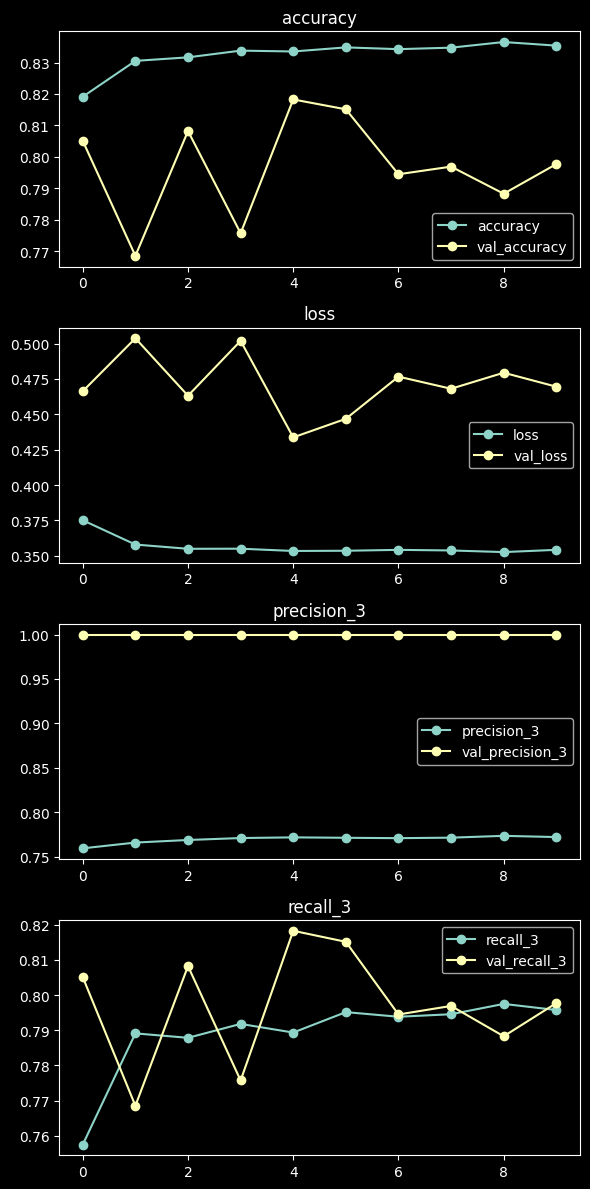

In [103]:
plot_history(history_best)


In [104]:
y_pred_proba_best = best_model.predict(X_test_processed)
y_pred_best = (y_pred_proba_best >= 0.5).astype(int).flatten()


382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



FINAL EVALUATION - BEST TUNED MODEL
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      9268
           1       0.63      0.79      0.70      2930

    accuracy                           0.84     12198
   macro avg       0.78      0.82      0.79     12198
weighted avg       0.86      0.84      0.84     12198



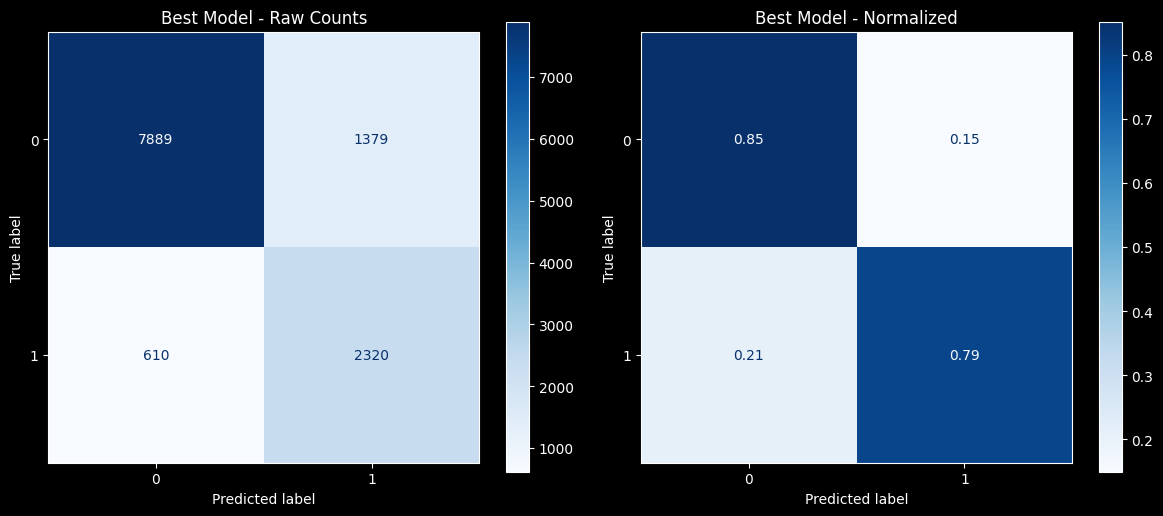

In [112]:
# Classification Report
print("\n" + "="*80)
print("FINAL EVALUATION - BEST TUNED MODEL")
print("="*80)
print(classification_report(y_test_encoded, y_pred_best))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test_encoded, y_pred_best,
    cmap='Blues', ax=axes[0]
)
axes[0].set_title('Best Model - Raw Counts')

ConfusionMatrixDisplay.from_predictions(
    y_test_encoded, y_pred_best,
    normalize='true', cmap='Blues', ax=axes[1]
)
axes[1].set_title('Best Model - Normalized')

plt.tight_layout()
plt.show()


MODEL COMPARISON
           Baseline NN  Tuned NN  Random Forest
Accuracy        0.8424    0.8369         0.8425
Precision       0.6442    0.6272         0.6686
Recall          0.7686    0.7918         0.6829
F1-Score        0.7009    0.7000         0.6757


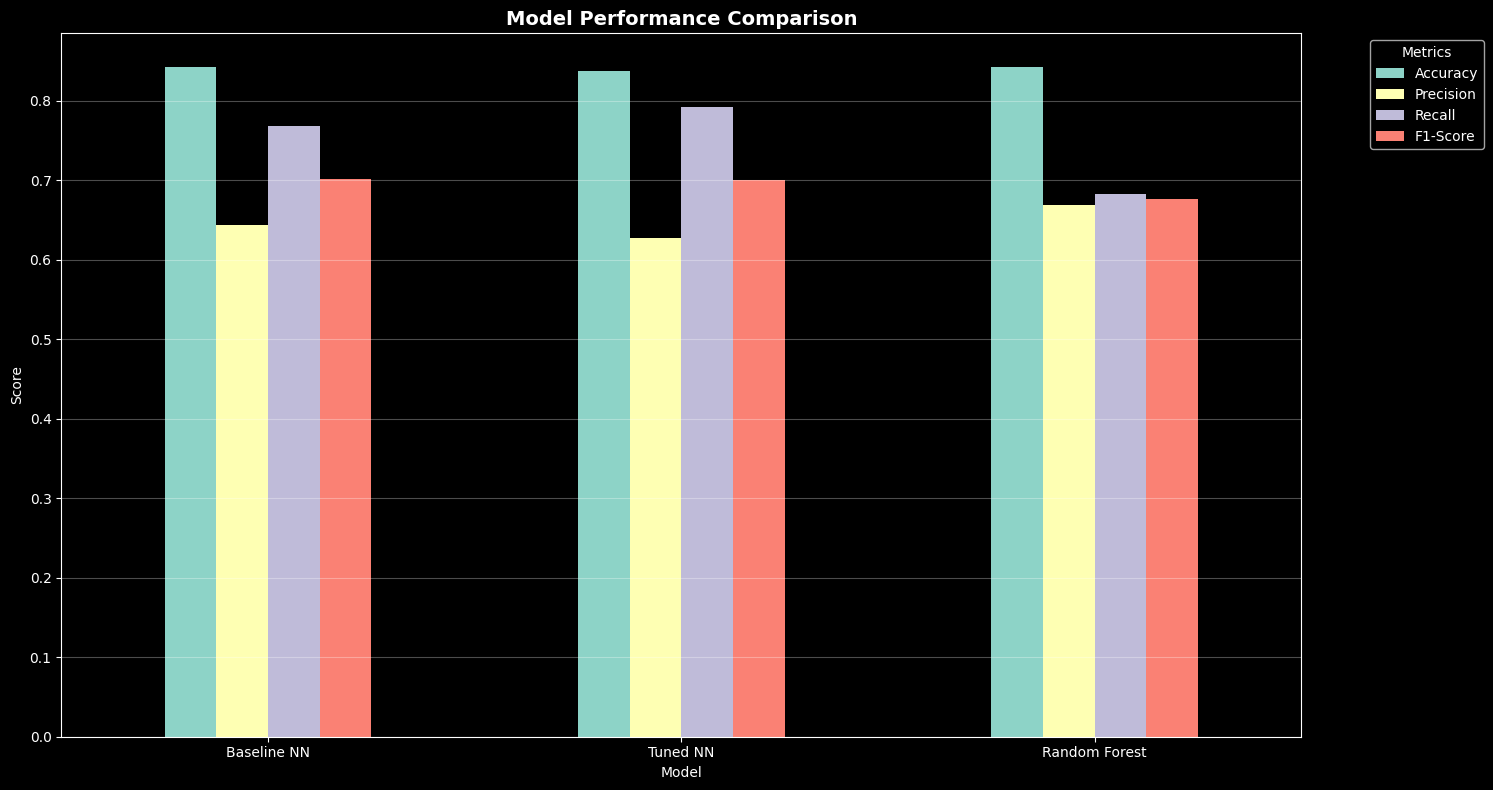

In [109]:
# ============================================================================
# 9. COMPARE WITH BASELINE AND RANDOM FOREST
# ============================================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baseline NN metrics
baseline_metrics = {
    'Accuracy': accuracy_score(y_test_encoded, y_pred_test),
    'Precision': precision_score(y_test_encoded, y_pred_test),
    'Recall': recall_score(y_test_encoded, y_pred_test),
    'F1-Score': f1_score(y_test_encoded, y_pred_test)
}

# Tuned NN metrics
tuned_metrics = {
    'Accuracy': accuracy_score(y_test_encoded, y_pred_best),
    'Precision': precision_score(y_test_encoded, y_pred_best),
    'Recall': recall_score(y_test_encoded, y_pred_best),
    'F1-Score': f1_score(y_test_encoded, y_pred_best)
}

# Get RF predictions and ENCODE them
rf_pred = Rf.predict(X_test_processed)

# Convert RF predictions from ['HIGH', 'LOW'] to [0, 1]
from sklearn.preprocessing import LabelEncoder

# Use the same encoder that was used for training
rf_pred_encoded = le.transform(rf_pred)  # le was created earlier in your code

rf_metrics = {
    'Accuracy': accuracy_score(y_test_encoded, rf_pred_encoded),
    'Precision': precision_score(y_test_encoded, rf_pred_encoded),
    'Recall': recall_score(y_test_encoded, rf_pred_encoded),
    'F1-Score': f1_score(y_test_encoded, rf_pred_encoded)
}

# Compare
comparison_df = pd.DataFrame({
    'Baseline NN': baseline_metrics,
    'Tuned NN': tuned_metrics,
    'Random Forest': rf_metrics
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_df.round(4))
print("="*80)

# Visualize comparison
comparison_df.T.plot(kind='bar', figsize=(15, 8), rot=0)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

